# Import and append the data

In [5]:
import pandas as pd
import time
import sys
import datetime as datetime

#Indlæs data og formater dato formatet
df_1pt= pd.read_pickle('both1.pkl')
df_2pt= pd.read_pickle('both2.pkl')
df_3pt= pd.read_pickle('both3.pkl')
df_4pt= pd.read_pickle('both4.pkl')
df_5pt= pd.read_pickle('both5.pkl')

AL_df=df_1pt.append(df_2pt)
AL_df=AL_df.append(df_3pt)
AL_df=AL_df.append(df_4pt)
AL_df=AL_df.append(df_5pt)

AL_df.set_index(pd.DatetimeIndex(AL_df['date']), inplace=True)
del AL_df['date']
AL_df

,job_title,job_describ,city,company
date,,,,
2009-12-31,ABB - Salgsingeniør / Lavspændingskomponenter ...,Til vores krævende og kompetente kunder som be...,Region Midtjylland,ABB A/S
2009-12-31,ABB - Salgsingeniør / Lavspændingskomponenter ...,På et marked hvor virksomheden i forvejen er e...,Region Midtjylland,ABB A/S
2009-12-31,ABB - Salgsingeniør / Lavspændingskomponenter ...,På et marked hvor virksomheden i forvejen er e...,Sydjylland,ABB A/S
2009-12-31,ABB - Salgsingeniør / Lavspændingskomponenter ...,Til vores krævende og kompetente kunder som be...,Region Nordjylland,ABB A/S
2009-12-31,ABB - Salgsingeniør / Lavspændingskomponenter ...,Til vores krævende og kompetente kunder som be...,Sydjylland,ABB A/S
2009-12-31,ABB - Salgsingeniør / Lavspændingskomponenter ...,På et marked hvor virksomheden i forvejen er e...,Region Nordjylland,ABB A/S
2009-12-31,Stud.jur. med interesse for personalejura,Du skal være med i et team der arbejder med pe...,Kgs. Lyngby,BRFkredit a/s
2009-12-31,Leder til bofællesskab,Til bofællesskabet Ganerbo i Skjern søges enga...,Skjern,Bofællesskabet Ganerbo
2009-12-31,Account Manager - Service Provider (English/Da...,The SP challenger & New Media team is seeking ...,København,Cisco


# Sammenlign BNP med joblisting

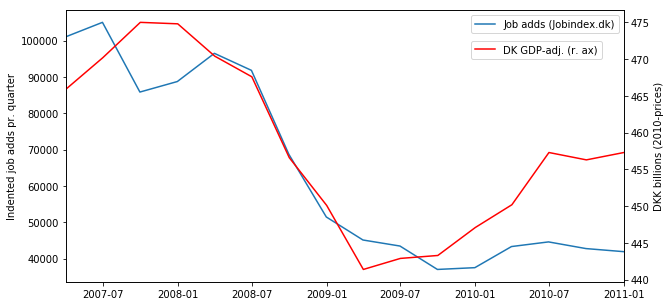

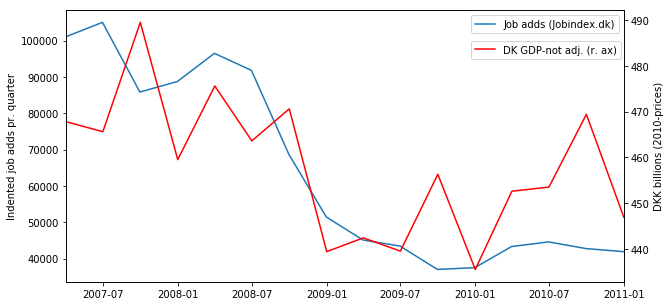

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


#Gruppering af datoer pr. kvartal samt udarbejdelse af graf

g_1 = AL_df.groupby(pd.Grouper(freq="Q"))  # DataFrameGroupBy (grouped by quaters)
quater_frq=g_1.count()['city']

#import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


#Gruppering af datoer pr. kvartal samt udarbejdelse af graf

g_1 = AL_df.groupby(pd.Grouper(freq="Q"))  # DataFrameGroupBy (grouped by quaters)
quater_frq=g_1.count()['city']


#BNP_seasonally_adjust.csv
AL_BNP=pd.read_csv('C:/Users/ander/Desktop/group19/Eksamensprojekt/BNP_seasonally_adjust.csv')
bnp=AL_BNP.iloc[:,4:6]
bnp=bnp[(bnp['TIME']<'2011Q2')]
bnp=bnp[(bnp['TIME']>'2007Q1')]
bnp.set_index(pd.DatetimeIndex(bnp['TIME']), inplace=True)
del bnp['TIME']


#Figure for kvartalsvis BNP + Jobindex (Fig.3)
fig, ax1 =plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(quater_frq, label='Job adds (Jobindex.dk)')
ax1.legend(loc="upper right")
ax2.plot(bnp, label='DK GDP-adj. (r. ax)', color='r',)
ax2.legend(loc=[0.727,0.82])
ax1.set_ylabel("Indented job adds pr. quarter")
ax2.set_ylabel("DKK billions (2010-prices)")
plt.xlim(['2007-04','2011-01'])
plt.savefig('Fig3_1.png')
plt.show()


# BNP ukorrigerede faste priser
AL_BNP=pd.read_csv('C:/Users/ander/Desktop/group19/Eksamensprojekt/BNP_non_seasonally_adjust.csv')
bnp=AL_BNP.iloc[:,4:6]
bnp=bnp[(bnp['TIME']<'2011Q2')]
bnp=bnp[(bnp['TIME']>'2007Q1')]
bnp.set_index(pd.DatetimeIndex(bnp['TIME']), inplace=True)
del bnp['TIME']


#Figure for kvartalsvis BNP + Jobindex (Fig.3)
fig, ax1 =plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(quater_frq, label='Job adds (Jobindex.dk)')
ax1.legend(loc="upper right")
ax2.plot(bnp, label='DK GDP-not adj. (r. ax)', color='r',)
ax2.legend(loc=[0.727,0.82])
ax1.set_ylabel("Indented job adds pr. quarter")
ax2.set_ylabel("DKK billions (2010-prices)")
plt.xlim(['2007-04','2011-01'])
plt.savefig('Fig3_2.png')
plt.show()



# Tester hvor mange hver vsh. har i perioden

In [355]:
#Annoncer i alt efter vsh.
from collections import Counter

AL_df07=AL_df[AL_df.index<'2008-01-01']
count07= pd.Series(AL_df07['company'].str.split(',').map(Counter).sum())

AL_df08=AL_df[(AL_df.index<'2009-01-01') & (AL_df.index>'2008-01-01')]
count08= pd.Series(AL_df08['company'].str.split(',').map(Counter).sum())


AL_df09=AL_df[(AL_df.index<'2010-01-01') & (AL_df.index>'2009-01-01')]
count09 = pd.Series(AL_df09['company'].str.split(',').map(Counter).sum())


AL_df10=AL_df[(AL_df.index<'2011-01-01') & (AL_df.index>'2010-01-01')]
count10 = pd.Series(AL_df10['company'].str.split(',').map(Counter).sum())



SystemError: <built-in function isinstance> returned a result with an error set

In [356]:
import seaborn as sns
import matplotlib.pyplot as plt
headeryear=[2007,2008,2009,2010]
minant=5
AL_alldf=pd.DataFrame(count07[count07>minant])
AL_alldf=pd.concat([AL_alldf,count08[count08>minant]],axis=1)
AL_alldf=pd.concat([AL_alldf,count09[count09>minant]],axis=1)
AL_alldf=pd.concat([AL_alldf,count10[count10>minant]],axis=1)
#AL_alldf.columns=headeryear


fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(data=AL_alldf, orient="h", palette='Set2')
ax.set(xlabel='Number of job advertisements', ylabel='Year')


NameError: name 'count07' is not defined

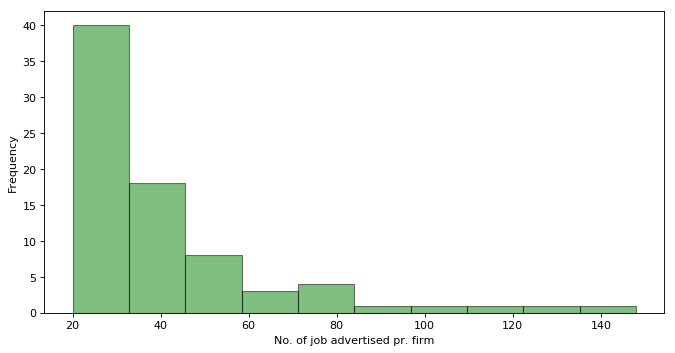

In [62]:
#Histogram
'''import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Laver en dict til ovenstående afsnit
n_jobs=count.sort_values(ascending=False)
job_count=n_jobs[n_jobs>=20]

#Creating a histogram
figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='b')
plt.xlabel('No. of job advertised pr. firm')
plt.ylabel('Frequency')
plt.hist(job_count, bins=10, alpha=0.5,color='g', histtype='bar', ec='black')
plt.savefig('Fig4.png')
plt.show() 

'''

# Bearbejd virksomheder i annonceringsdata

In [7]:
#Gruppering gruppering mht. Vsh og dato i jobannonce delen
import pandas as pd
pd.options.display.max_rows=1200


List=['Maersk','Carlsb', 'Colopla','Danske Ba','DSV','Jyske B','Nordea',\
      'Novo N','Novozy','Vestas','Tryg F','H. Lund', 'Alm. Br','SAS']           

month_frq=pd.DataFrame()


for i in List:
    C20list=AL_df[AL_df['company'].astype(str).str[0:len(i)]==i]
    gg = C20list.groupby(pd.Grouper(freq="M")) # DataFrameGroupBy (grouped by Month)
    month_frq=pd.concat([month_frq,gg.count()['company']], axis=1) 

c20job_headers=['Maersk','Carlsberg', 'Coloplast','Danske Bank','DSV','Jyske Bank','Nordea','Novo Nordisk','Novozymes','Vestas', 'Tryg','H. Lundbeck','Alm. Brand', 'SAS']

month_frq.columns=c20job_headers

# TAbel over annonceringer
jobs_sum=month_frq.describe().round(1).T
del jobs_sum['count']
jobs_sum

,mean,std,min,25%,50%,75%,max
Maersk,17.8,21.3,0.0,4.0,8.0,29.2,111.0
Carlsberg,16.8,8.8,5.0,10.0,14.0,20.2,41.0
Coloplast,13.7,12.5,0.0,5.0,9.5,18.0,55.0
Danske Bank,23.9,16.4,1.0,9.8,21.5,33.8,73.0
DSV,10.4,7.4,1.0,5.0,9.0,13.0,38.0
Jyske Bank,25.0,13.9,3.0,11.8,26.0,35.2,52.0
Nordea,32.9,18.8,5.0,19.0,30.0,44.2,102.0
Novo Nordisk,77.8,29.8,24.0,57.8,79.0,99.2,138.0
Novozymes,16.5,7.4,3.0,11.8,15.0,21.2,34.0
Vestas,152.4,76.7,1.0,89.2,159.0,200.2,345.0


# Indlæs aktiedata lokalt og tilpasning

In [9]:
tickers={'MAERSK_B':'CSE3201','CARL_B':'CSE1596',\
         'COLO_B':'CSE3203','DANSKE':'CSE1586','DSV':'CSE3415',\
         'JYSK':'CSE1587','NDA_DKK':'CSE4861','NOVO_B':'CSE1158',\
         'NZYM_B':'CSE11273','TRYG':'CSE31315','VWS':'CSE3258','LUN':'CSE3853',\
         'ALMB':'CSE3340','SAS_DKK':'CSE13584'}


path_csv="C:/Users/ander/Desktop/group19/Eksamensprojekt/omx_c20/"

df_c20=pd.DataFrame()

for i in tickers:
    nasd_csv=path_csv +str(i)+ "-2006-01-02-2018-08-28.csv"
    df= pd.read_csv(nasd_csv,sep=";",header=1, decimal=",")
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True) #Setting the date as index
    df_o=pd.DataFrame(df)
    df_r=df_o['Closing price'] # Getting only the closing price
    df_c20=pd.concat([df_c20,df_r], axis=1) 

headers=c20job_headers
df_c20.columns=headers
df_c20 #Closing prices with headersfor the chosen stock

#Aktiekurs EOM
    #df_c20=df_c20.groupby(pd.Grouper(freq='M')).nth(0) #getting the closing price of the last trading day in the month
df_c20l=df_c20.resample('M').last()
c20_stockp=df_c20l.iloc[12:60,:] #Reguler tidsafgrænsning


#Laver en gns. aktiekurs EOM
df_c20mean=df_c20.resample('M').mean()
c20_stockpmean=df_c20mean.iloc[12:60,:] #Reguler tidsafgrænsning


#Tabel 1 - stock prices 
c20p_sum=c20_stockp.describe().round().T
del c20p_sum['count']
print(c20p_sum)

                mean     std     min     25%     50%      75%      max
Maersk        9512.0  2644.0  4920.0  7180.0  9385.0  11555.0  14500.0
Carlsberg      433.0   117.0   171.0   367.0   462.0    517.0    594.0
Coloplast       96.0    22.0    69.0    81.0    92.0    107.0    153.0
Danske Bank    138.0    56.0    35.0   109.0   127.0    177.0    244.0
DSV             95.0    22.0    41.0    82.0    98.0    112.0    136.0
Jyske Bank     251.0    98.0    96.0   179.0   230.0    330.0    417.0
Nordea          63.0    19.0    27.0    50.0    58.0     80.0     95.0
Novo Nordisk    69.0    19.0    48.0    57.0    63.0     69.0    126.0
Novozymes      107.0    22.0    77.0    88.0   101.0    128.0    155.0
Vestas          72.0    11.0    50.0    66.0    70.0     80.0     96.0
Tryg           364.0   129.0   163.0   268.0   359.0    422.0    692.0
H. Lundbeck    114.0    19.0    83.0   100.0   109.0    126.0    163.0
Alm. Brand      65.0    46.0    14.0    28.0    39.0    110.0    159.0
SAS   

# Printer grafer for vsh. job annoncer + aktie kurser

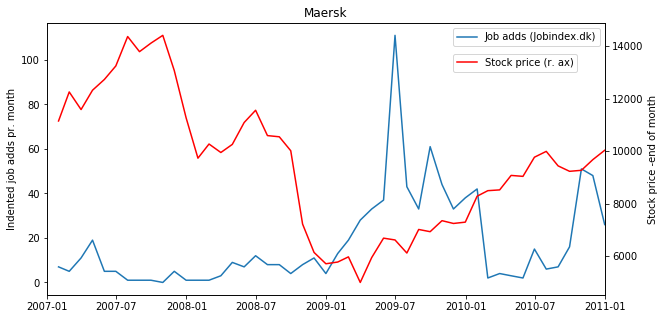

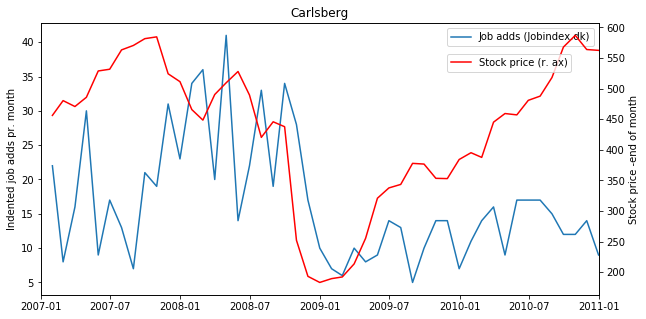

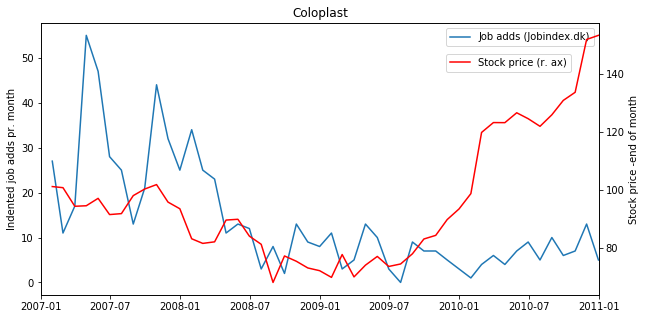

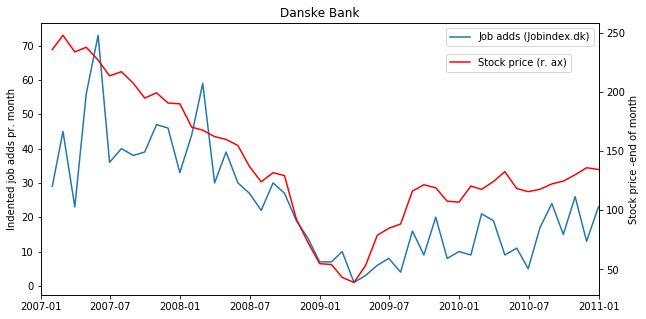

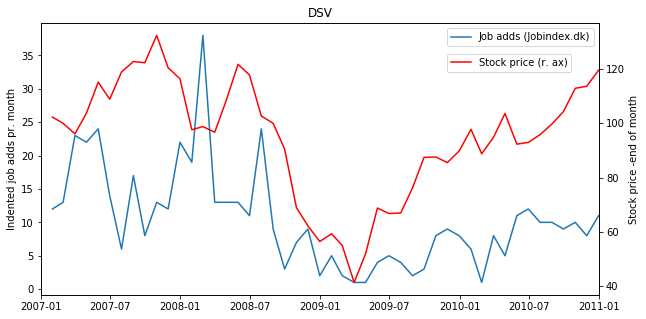

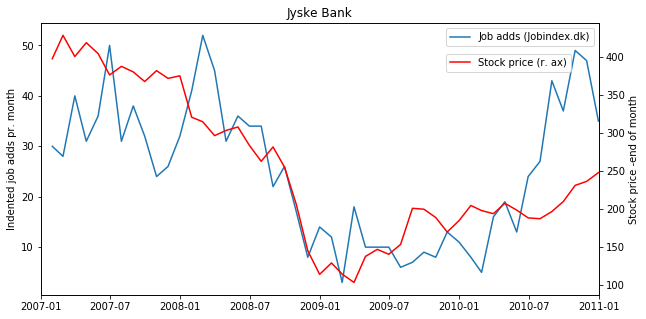

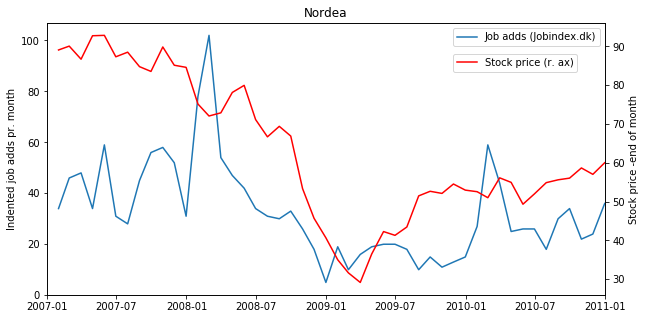

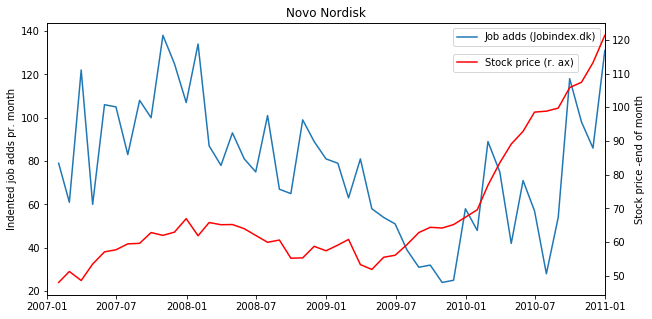

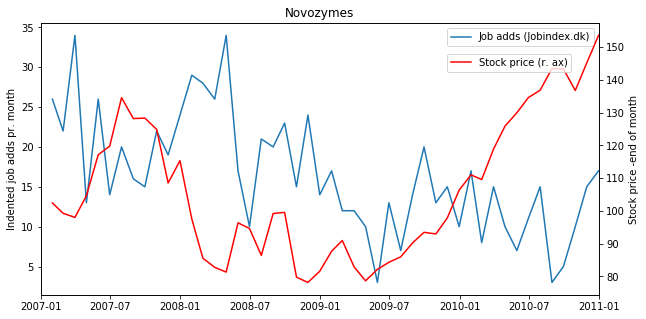

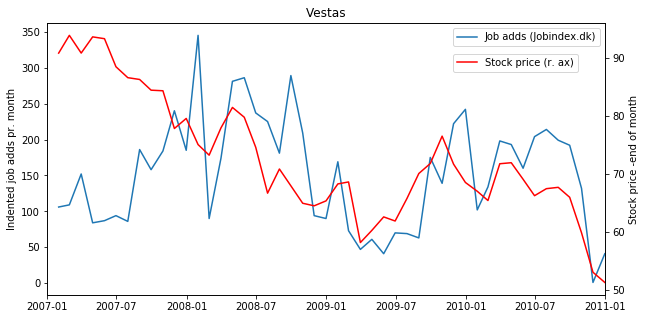

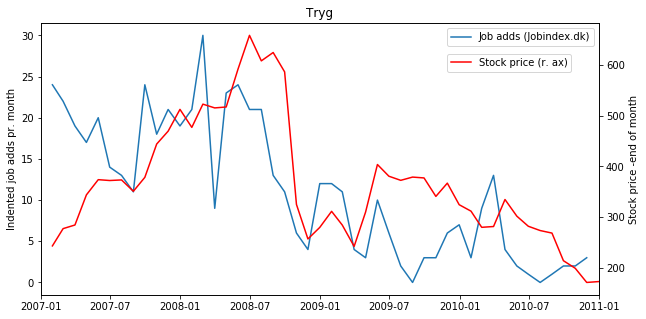

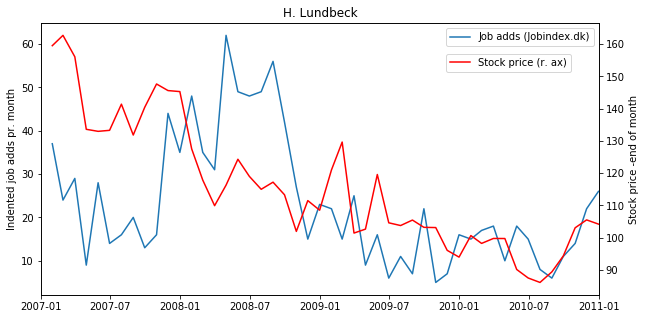

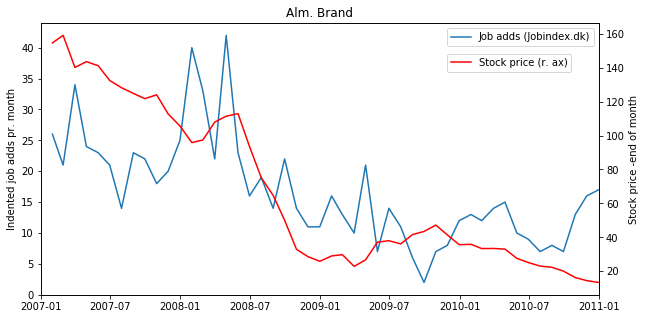

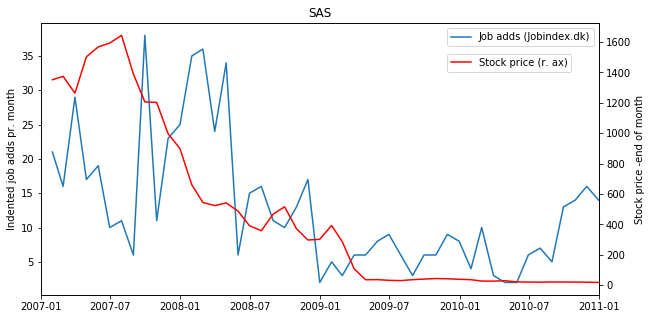

In [10]:

for i in month_frq.columns:
    fig, ax1 =plt.subplots(figsize=(10,5))
    ax2 = ax1.twinx()
    ax1.plot(month_frq[str(i)], label='Job adds (Jobindex.dk)')
    ax1.legend(loc="upper right")
    ax2.plot(c20_stockpmean[str(i)], label='Stock price (r. ax)', color='r',)
    ax2.legend(loc=[0.727,0.82])
    ax1.set_ylabel("Indented job adds pr. month")
    ax2.set_ylabel("Stock price -end of month")
    plt.xlim(['2007-01','2011-01'])
    plt.title(i)
    plt.savefig('Fig'+str(i)+'.png')
    plt.show()


    

In [217]:
#Definer ny tabel til Modellering
jobs_ialt=month_frq.iloc[:,1:]
jobs_ialt.columns=['Carlsberg_jobs', 'Coloplast_jobs','Danske_Bank_jobs','DSV_jobs','Jyske_Bank_jobs','Nordea_jobs',\
                   'Novo_Nordisk_jobs','Novozymes_jobs','Vestas_jobs', 'Tryg_jobs','H_Lundbeck_jobs','Alm_Brand_jobs', 'SAS_jobs']

alt_ialt=c20_stockp.iloc[:,1:]
alt_ialt=pd.concat([alt_ialt,jobs_ialt],axis=1)
alt_ialt.to_pickle('job_kurser.pkl')

In [436]:
'''import pandas as pd
import linearmodels
from linearmodels import PanelOLS
import numpy as np
import datetime

#month_frq.index = pd.to_datetime(month_frq.index)
month_frq.index=pd.to_datetime(month_frq.index,format='%m/%d/%Y')
c20_stockp.index=pd.to_datetime(c20_stockp.index,format='%m/%d/%Y')


AL_multindex=pd.concat([month_frq.stack(),c20_stockp.stack()],axis=1)
AL_multindex.columns=['x','y']
AL_multindex['x'].fillna(0,inplace=True)

print(AL_multindex)'''

                             x          y
2007-01-31 Alm. Brand     31.0    158.523
           Carlsberg      37.0    468.188
           Coloplast      49.0     98.700
           DSV            30.0     98.500
           Danske Bank   368.0    243.834
           H. Lundbeck     0.0    163.250
           Jyske Bank     35.0    411.688
           Maersk        148.0  11540.000
           Nordea        226.0     90.250
           Novo Nordisk  172.0     49.300
           Novozymes      35.0     98.800
           SAS            67.0   1349.288
           Tryg           28.0    252.500
           Vestas         46.0     94.000
2007-02-28 Alm. Brand      0.0    147.463
           Carlsberg       0.0    469.802
           Coloplast       0.0     94.200
           DSV             0.0     97.300
           Danske Bank     0.0    241.058
           H. Lundbeck     0.0    151.000
           Jyske Bank      0.0    403.324
           Maersk          0.0  11620.000
           Nordea          0.0    

# FE-estimation

In [13]:
import numpy as np
#Stack værdier 
stackjobs=month_frq.iloc[:,0]

for i in range(1,len(month_frq.columns)):
    stackjobs=pd.concat([stackjobs,month_frq.iloc[:,i]])    
stackjobs.reset_index()
stackjobs.fillna(0, inplace=True)


stackakt=c20_stockp.iloc[:,0]

for i in range(1,len(c20_stockp.columns)):
    stackakt=pd.concat([stackakt,c20_stockp.iloc[:,i]])    
stackakt.reset_index()
stackakt.fillna(0)
np.log(stackakt)


stackdata=pd.concat([stackjobs,stackakt],axis=1)


#Lav index
nytid=list(pd.date_range('1-1-2007',freq='M', periods=48))
tidsliste=[]
for v in nytid:
    tidsliste.append(v)

firmmulti=[]
#for i in range(len(month_frq.index)):
for v in month_frq.columns:
    firmmulti.append(v)


    
#Regression FE
index = pd.MultiIndex.from_product([firmmulti,tidsliste])

df = pd.DataFrame(stackdata.values,index=index, columns=['y','x'])

from linearmodels.panel import PanelOLS

mod = PanelOLS(df.y, df.x, entity_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
res

Dep. Variable:,y,R-squared:,0.0079
Estimator:,PanelOLS,R-squared (Between):,-0.0659
No. Observations:,672,R-squared (Within):,0.0079
Date:,"Wed, Aug 29 2018",R-squared (Overall):,-0.0509
Time:,23:47:37,Log-likelihood,-3109.7
Cov. Estimator:,Clustered,,
,,F-statistic:,5.2066
Entities:,14,P-value,0.0228
Avg Obs:,48.000,Distribution:,"F(1,657)"
Min Obs:,48.000,,
Max Obs:,48.000,F-statistic (robust):,8.9524
